<a href="https://colab.research.google.com/github/rodriquiel/Prediccion_Lluvia/blob/main/ProyectoLluvia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduccion

En este notebook, se busca utilizar diferentes algoritmos de clasificacion para crear un modelo basado en datos de entrenamiento y evaluarlo a traves de diferentes metricas utilizando datos de prueba.

Los algoritmos a utilizar son:

1.  Linear Regression
2.  KNN
3.  Decision Trees
4.  Logistic Regression
5.  SVM

Mientras que las metricas para evaluar el modelo a utilizar son:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error (MAE)
6.  Mean Squared Error (MSE)
7.  R2-Score

#Informacion del Dataset

La fuente original de los datos a utilizar es de la Oficina de Meteorología del Gobierno de Australia, la cual puede obtenerse a traves del siguiente link: [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

El conjunto de datos que se utilizará tiene columnas adicionales como 'RainToday' y nuestro objetivo es 'RainTomorrow', que se recopiló del Rattle en: [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

Este dataset contiene observaciones de variables del clima de cada dia entre los años 2008 y 2017, donde se incluyen los siguientes campos:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Año de la observacion en formato YYYY-MM-DD                 | Date            | object |
| Location      | Lugar de la observacion                           | Location        | object |
| MinTemp       | Temperatura minima                                   | Celsius         | float  |
| MaxTemp       | Temperatura maxima                                   | Celsius         | float  |
| Rainfall      | Cantidad de lluvia                                    | Millimeters     | float  |
| Evaporation   | Cantidad de evaporacion                                 | Millimeters     | float  |
| Sunshine      | Cantidad de luz solar                             | hours           | float  |
| WindGustDir   | Direccion de la rafaga mas fuerte                       | Compass Points  | object |
| WindGustSpeed | Velocidad de la rafaga mas fuerte                           | Kilometers/Hour | object |
| WindDir9am    | Dirección del viento promediada 10 minutos antes de las 9am    | Compass Points  | object |
| WindDir3pm    | Dirección del viento promediada 10 minutos antes de las 3pm     | Compass Points  | object |
| WindSpeed9am  | Velocidad del viento promediada 10 minutos antes de las 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Velocidad del viento promediada 10 minutos antes de las 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humedad a las 9am                                       | Percent         | float  |
| Humidity3pm   | Humedad a las 3pm                                       | Percent         | float  |
| Pressure9am   | Presion atmosferica reducida al nivel medio del mar a las 9am | Hectopascal     | float  |
| Pressure3pm   | Presion atmosferica reducida al nivel medio del mar a las 3pm | Hectopascal     | float  |
| Cloud9am      | Fracción del cielo oscurecida por las nubes a las 9am         | Eights          | float  |
| Cloud3pm      | Fracción del cielo oscurecida por las nubes a las 3pm          | Eights          | float  |
| Temp9am       | Temperatura a las 9am                                    | Celsius         | float  |
| Temp3pm       | Temperatura a las 3pm                                    | Celsius         | float  |
| RainToday     | Si llovió hoy                               | Yes/No          | object |
| RISK_MM       | Cantidad de lluvia mañana                               | Millimeters     | float  |
| RainTomorrow  | Si va a llover mañana                             | Yes/No          | float  |

Las definiciones de columnas fueron obtenidas de [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

#Librerias a utilizar

In [ ]:
# Suprimir warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import requests

async def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

In [ ]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'
await download(path, "Weather_Data.csv")
filename ="Weather_Data.csv"

In [ ]:
df = pd.read_csv("Weather_Data.csv")
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


#Preprocesamiento de datos

##One Hot Encoding

Primero se utiliza el One Hot Encoding para convertir las variables categoricas a variables binarias

In [ ]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

El siguiente paso consiste en reemplazar los valores de la columna 'RainTomorrow', cambiándolos de una columna categórica a una columna binaria. No se utiliza el método get_dummies porque terminaria con dos columnas para 'RainTomorrow', lo cual no es lo buscado, ya que 'RainTomorrow' es la variable objetivo.

In [ ]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

#Training Data y Test Data

Se setean los valores de X (features) e Y (objetivo)

In [ ]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [ ]:
df_sydney_processed = df_sydney_processed.astype(float)

In [ ]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

#Metricas a utilizar

- **Accuracy Score**:
  Mide la proporción de predicciones correctas realizadas por el modelo. Es una métrica comúnmente utilizada en problemas de clasificación y proporciona una medida general del rendimiento del modelo.

- **Jaccard Index**:
  También conocido como coeficiente de similitud de Jaccard, es una métrica que mide la similitud entre dos conjuntos de datos. En el contexto de la clasificación, se utiliza para medir la similitud entre el conjunto de etiquetas predichas por el modelo y el conjunto de etiquetas reales.

- **F1-Score**:
  Es la media armónica de precisión y recuperación. Proporciona una medida equilibrada del rendimiento del modelo, especialmente en situaciones en las que hay un desequilibrio entre las clases. Es útil cuando se quiere tener en cuenta tanto la precisión como la exhaustividad en la evaluación del modelo.

- **LogLoss**:
  Es una medida de la precisión de las probabilidades predichas por el modelo en problemas de clasificación. Cuanto menor sea el valor de LogLoss, mejor será el rendimiento del modelo. LogLoss penaliza las predicciones incorrectas más severamente cuando están muy seguras de sí mismas y menos cuando están menos seguras.

- **Mean Absolute Error (MAE)**:
  Es una métrica utilizada en problemas de regresión que mide la magnitud promedio de los errores en las predicciones del modelo. Es la media de las diferencias absolutas entre las predicciones y los valores reales.

- **Mean Squared Error (MSE)**:
  También es una métrica utilizada en problemas de regresión y es similar al MAE, pero eleva al cuadrado las diferencias entre las predicciones y los valores reales antes de tomar la media. Esto penaliza más los errores grandes.

- **R2-Score**:
  Es una medida de qué tan bien las variables independientes explican la variabilidad de la variable dependiente en problemas de regresión. Un valor de R2 más cercano a 1 indica un mejor ajuste del modelo a los datos.




#Regresion Lineal

La regresión lineal asume una relación lineal entre las variables independientes y la variable dependiente. Utiliza coeficientes para ponderar las características y predecir el valor objetivo. Una vez que se entrena el modelo, se utiliza para predecir valores numéricos basados en las características proporcionadas. El algoritmo busca encontrar la "línea de mejor ajuste" que minimiza la diferencia entre las predicciones del modelo y los valores reales observados en el conjunto de datos de entrenamiento.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10, stratify=Y)

In [ ]:
LinearReg = LinearRegression()
LinearReg.fit(x_train,y_train)

LinearRegression()

In [ ]:
predictions = LinearReg.predict(x_test)

In [ ]:
predictions[predictions < 0] = 0
predictions[predictions > 1] = 1

##Metricas para evaluar el rendimiento y precision del modelo



1.   MAE (Error Absoluto Medio)
2.   MSE (Error Cuadratico Medio)
3.   R2-Score



In [ ]:
LinearRegression_MAE = metrics.mean_absolute_error(y_test,predictions)
LinearRegression_MSE = metrics.mean_squared_error(y_test,predictions)
LinearRegression_R2 = metrics.r2_score(y_test,predictions)

In [ ]:
Report = pd.DataFrame({'MAE': [LinearRegression_MAE],
                       'MSE': [LinearRegression_MSE],
                       'R2': [LinearRegression_R2]},
                     index=['Linear Regression'])
print(Report)

                        MAE       MSE       R2
Linear Regression  0.244415  0.124375  0.35282


Estos resultados indican que el modelo de regresión lineal puede no estar capturando completamente la relación entre las variables independientes y la variable objetivo, ya que tanto el MAE como el MSE no son muy bajos, y el R^2 no es muy alto. Es posible que sea necesario considerar modelos más complejos o características adicionales para mejorar la precisión predictiva del modelo.







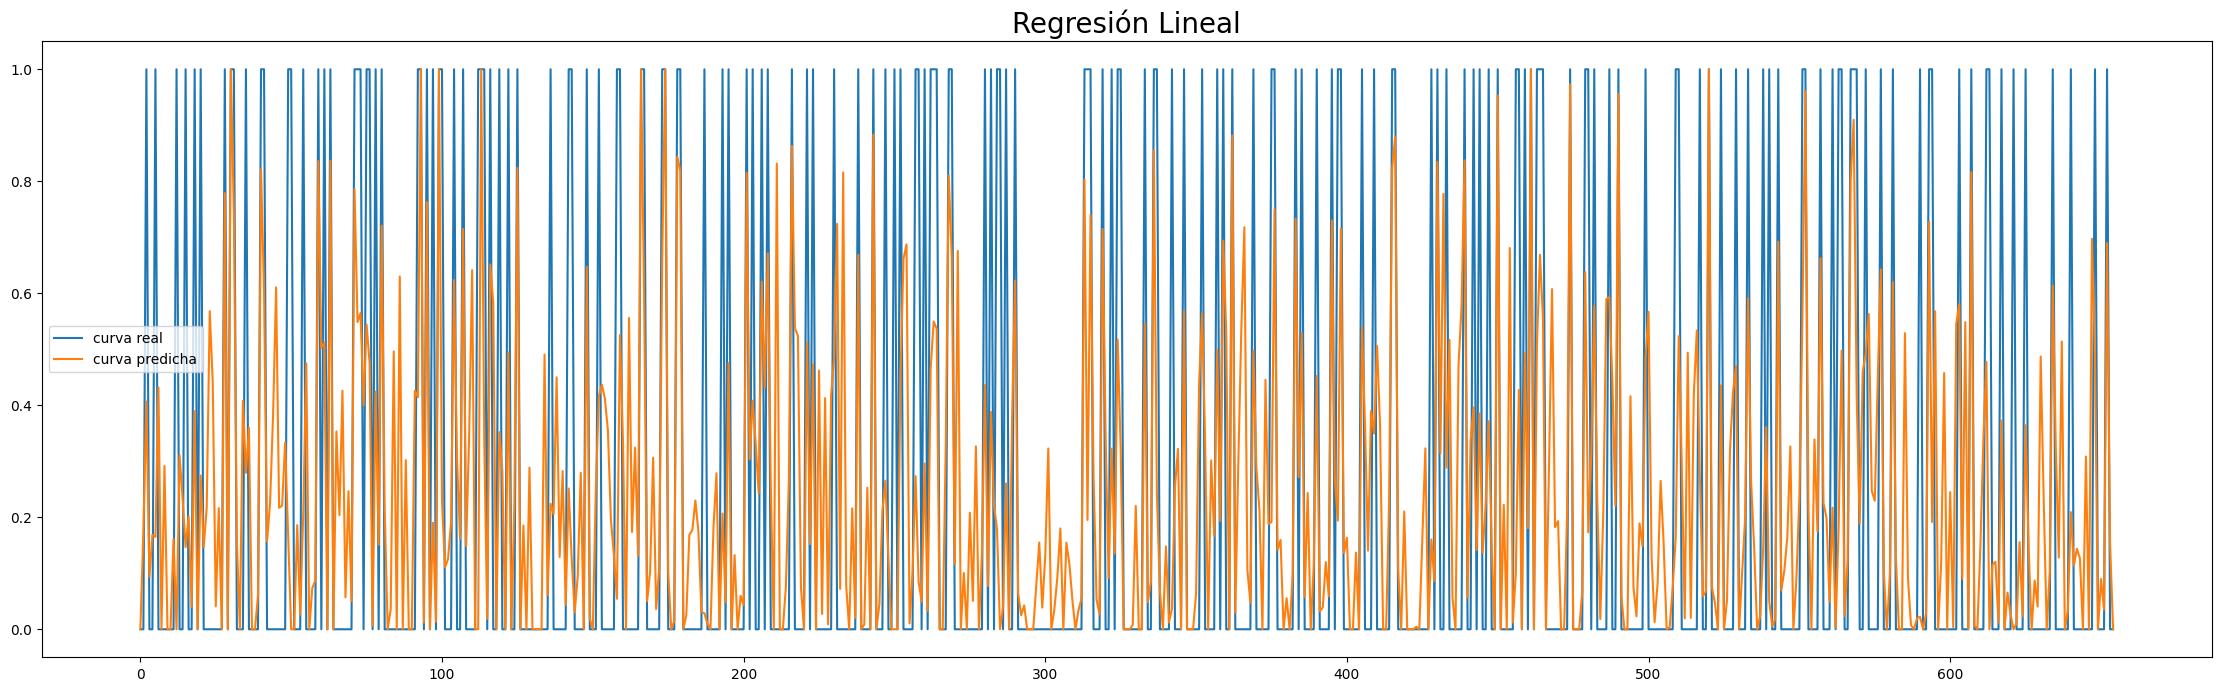

In [ ]:
# Comparación de la salida real vs predicha
plt.figure(figsize=(28,8))

# Trama usando datos etiquetados (los reales del dataset)
plt.plot(np.arange(len(x_test)), y_test.values, label='curva real')

# Trama usando datos predichos
plt.plot(np.arange(len(x_test)), predictions, label='curva predicha')

plt.title('Regresión Lineal', fontsize=20)
plt.legend()

#KNN (K Nearest Neighbors)

KNN (k-Nearest Neighbors) es un algoritmo de aprendizaje supervisado utilizado principalmente para problemas de clasificación y regresión.

En el caso de la clasificación, cuando se proporciona un nuevo punto de datos, el algoritmo KNN busca los k puntos de datos más cercanos en el conjunto de entrenamiento y asigna la clase más común entre estos vecinos al nuevo punto de datos. La elección de k, el número de vecinos, es un hiperparámetro que puede variar y afectar el rendimiento del algoritmo.

Para problemas de regresión, en lugar de predecir una clase, KNN predice un valor numérico basado en el promedio (o la mediana) de los valores de los vecinos más cercanos.

Para este caso, se opto por un n_neighbors = 4

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
predictions = KNN.predict(x_test)

In [ ]:
KNN_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
KNN_JaccardIndex = metrics.jaccard_score(y_test, predictions)
KNN_F1_Score = metrics.f1_score(y_test, predictions)

In [ ]:
data = {'Accuracy': [KNN_Accuracy_Score],
         'Jaccard Index': [KNN_JaccardIndex],
         'F1 Score': [KNN_F1_Score]}
Report = pd.DataFrame(data, index=['KNN'])
print(Report)

     Accuracy  Jaccard Index  F1 Score
KNN  0.815267       0.366492  0.536398


El modelo KNN tiene una precisión del 81.53%, un índice de Jaccard del 36.65% y un F1 Score del 53.64%. Estos valores sugieren un rendimiento moderado en la clasificación, con espacio para mejorar comparado con otros modelos. Podria resultar útil ajustar los hiperparámetros del modelo o considerar otras técnicas de modelado para mejorar su rendimiento.







#Arbol de Decision

El árbol de decisión se estructura como un árbol, donde cada nodo interno representa una característica (o atributo) del conjunto de datos, cada borde representa una decisión basada en esa característica, y cada hoja representa el resultado de la decisión. El proceso de construcción del árbol implica dividir recursivamente el conjunto de datos en subconjuntos más pequeños basados en características específicas, de modo que en cada nodo se maximice la homogeneidad de la variable objetivo.

In [ ]:
Tree = DecisionTreeClassifier()
Tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions = Tree.predict(x_test)

In [ ]:
Tree_Accuracy_Score = metrics.accuracy_score(y_test, predictions)
Tree_JaccardIndex = metrics.jaccard_score(y_test, predictions)
Tree_F1_Score = metrics.f1_score(y_test, predictions)

In [ ]:
data = {'Accuracy': [Tree_Accuracy_Score],
         'Jaccard Index': [Tree_JaccardIndex],
         'F1 Score': [Tree_F1_Score]}
Report = pd.DataFrame(data, index=['Tree'])
print(Report)

      Accuracy  Jaccard Index  F1 Score
Tree  0.775573       0.374468  0.544892


El modelo de árbol de clasificación muestra un rendimiento moderado en la clasificación, con una precisión del 76.34%, un índice de Jaccard del 36.21% y un F1 Score del 53.17%.

#Regresion Logistica

La regresión logística modela la relación entre una variable dependiente binaria y una o más variables independientes mediante la función logística. La función logística, también conocida como función sigmoide, transforma una entrada continua en un valor entre 0 y 1, lo que representa la probabilidad de pertenencia a una de las dos clases.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1, stratify=Y)

In [ ]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [ ]:
predictions = LR.predict(x_test)

In [ ]:
LR_Accuracy_Score = metrics.accuracy_score(y_test,predictions)
LR_JaccardIndex = metrics.jaccard_score(y_test,predictions)
LR_F1_Score = metrics.f1_score(y_test,predictions)
LR_Log_Loss = metrics.log_loss(y_test,predictions)

In [ ]:
data = {'Accuracy': [LR_Accuracy_Score],
         'Jaccard Index': [LR_JaccardIndex],
         'F1 Score': [LR_F1_Score],
         'LogLoss': [LR_Log_Loss]}
Report = pd.DataFrame(data, index=['LR'])
print(Report)

    Accuracy  Jaccard Index  F1 Score   LogLoss
LR  0.838168       0.467337  0.636986  5.833019


El modelo logístico muestra un rendimiento general sólido en la clasificación, con una precisión del 83.82%, un índice de Jaccard del 46.73%, un F1 Score del 63.70% y una LogLoss de 5.833. Estas métricas proporcionan una visión general del rendimiento del modelo en términos de su capacidad para realizar predicciones precisas y estimar las probabilidades de clase correctamente.

#SVM (Support Vector Machine)

SVM es un algoritmo de aprendizaje supervisado utilizado tanto para problemas de clasificación como para problemas de regresión. Su objetivo principal es encontrar el hiperplano óptimo que mejor separa las clases en el espacio de características.

En el contexto de la clasificación binaria, un hiperplano es una superficie de decisión que maximiza el margen entre las clases. Este margen es la distancia perpendicular desde el hiperplano a los puntos de datos más cercanos de cada clase, que se denominan vectores de soporte. Los SVM buscan encontrar el hiperplano que maximiza este margen, lo que se conoce como el hiperplano óptimo.

In [ ]:
SVM = svm.SVC()
SVM.fit(x_train,y_train)

SVC()

In [ ]:
predictions = SVM.predict(x_test)

In [ ]:
SVM_Accuracy_Score = metrics.accuracy_score(predictions,y_test)
SVM_JaccardIndex = metrics.jaccard_score(predictions,y_test)
SVM_F1_Score = metrics.f1_score(predictions,y_test)

In [ ]:
data = {'Accuracy': [SVM_Accuracy_Score],
         'Jaccard Index': [SVM_JaccardIndex],
         'F1 Score': [SVM_F1_Score]}
Report = pd.DataFrame(data, index=['SVM'])
print(Report)

     Accuracy  Jaccard Index  F1 Score
SVM  0.740458            0.0       0.0


El modelo SVM no está funcionando bien en este conjunto de datos en particular. Una precisión del 74.05% puede parecer aceptable a primera vista, pero el hecho de que el índice de Jaccard y el F1 Score sean ambos del 0% indica que el modelo no está clasificando correctamente ninguna de las instancias.

#Comparacion de resultados entre modelos

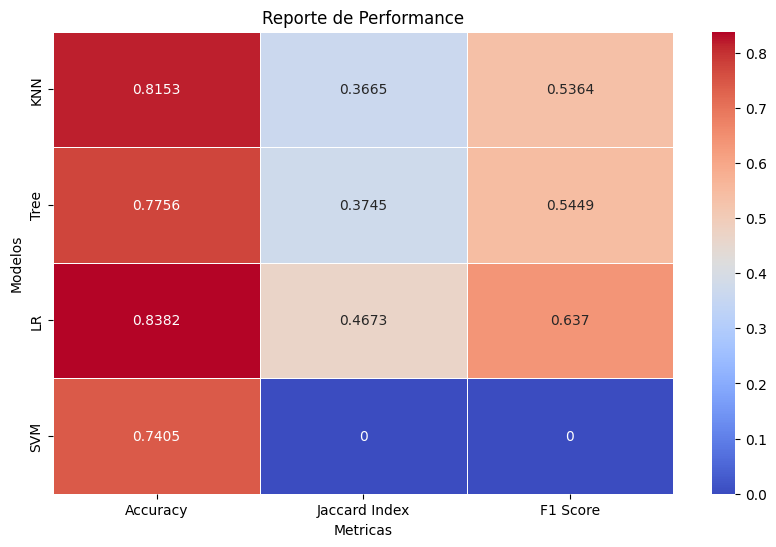

In [ ]:
# Crea el DataFrame
data = {'Accuracy': [KNN_Accuracy_Score, Tree_Accuracy_Score, LR_Accuracy_Score, SVM_Accuracy_Score],
         'Jaccard Index': [KNN_JaccardIndex, Tree_JaccardIndex, LR_JaccardIndex, SVM_JaccardIndex],
         'F1 Score': [KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVM_F1_Score]}
Report = pd.DataFrame(data, index=['KNN', 'Tree', 'LR', 'SVM'])


# Crea el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(Report, annot=True, cmap='coolwarm', fmt='.4g', cbar=True, linewidths=0.5)
plt.title('Reporte de Performance')
plt.xlabel('Metricas')
plt.ylabel('Modelos')
plt.show()

En base a estas métricas, el modelo de regresión logística (LR) parece tener el mejor rendimiento general, ya que tiene la precisión, el índice de Jaccard y el F1 Score más altos entre los modelos evaluados. Además, el modelo LR es el único que proporciona un valor de LogLoss, lo que sugiere que tiene una mejor calibración de las probabilidades predichas. Por lo tanto, en este caso, el modelo de regresión logística podría considerarse como el mejor modelo de los evaluados.